<a href="https://colab.research.google.com/github/adhilabu/advanced-learning-algorithms-coursera/blob/main/C2_W1_Lab01_Neurons_and_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional Lab - Neurons and Layers
In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.
<figure>
   <img src="https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C2%20-%20Advanced%20Learning%20Algorithms/week1/optional-labs/images/C2_W1_NeuronsAndLayers.png?raw=1"  style="width:540px;height:200px;" >
</figure>


In [ ]:
!pip install tensorflow

## Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface.

In [ ]:
# --- Minimal replacements for missing course utilities ---
import numpy as np
import matplotlib.pyplot as plt

class dlc:
    # simple color map used in course examples
    colors = {
        'blue': 'C0',
        'green': 'C1',
        'red': 'C3',
        'purple': 'C4',
        'orange': 'C2'
    }

def sigmoidnp(x):
    x = np.array(x, dtype=float)
    return 1.0 / (1.0 + np.exp(-x))

def plt_prob_1d(x, probs, label=None):
    """
    x: 1D array of inputs
    probs: 1D array of P(y=1) values
    """
    plt.figure()
    plt.plot(x, probs, linewidth=2, label=label)
    plt.fill_between(x, probs, alpha=0.15)
    plt.ylim(-0.05, 1.05)
    plt.xlabel('x')
    plt.ylabel('P(y=1)')
    if label is not None:
        plt.legend()
    plt.grid(True)
    plt.show()

def plt_linear(w, b, xmin=-6, xmax=6):
    """
    Plot a 1-D linear function y = w*x + b
    w can be scalar or 1-element array
    """
    x = np.linspace(xmin, xmax, 200)
    w_val = float(np.ravel(w)[0]) if np.size(w) >= 1 else float(w)
    y = w_val * x + float(b)
    plt.figure()
    plt.plot(x, y, label=f'linear w={w_val:.3g}, b={float(b):.3g}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

def plt_logistic(w, b, xmin=-6, xmax=6):
    """
    Plot logistic sigmoid of a 1-D linear function: sigmoid(w*x + b)
    """
    x = np.linspace(xmin, xmax, 200)
    w_val = float(np.ravel(w)[0]) if np.size(w) >= 1 else float(w)
    y = sigmoidnp(w_val * x + float(b))
    plt.figure()
    plt.plot(x, y, label=f'logistic w={w_val:.3g}, b={float(b):.3g}')
    plt.ylim(-0.05, 1.05)
    plt.xlabel('x')
    plt.ylabel('P(y=1)')
    plt.legend()
    plt.grid(True)
    plt.show()
# --- end replacements ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
# from lab_utils_common import dlc
# from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear Model

### DataSet
We'll use an example from Course 1, linear regression on house prices.

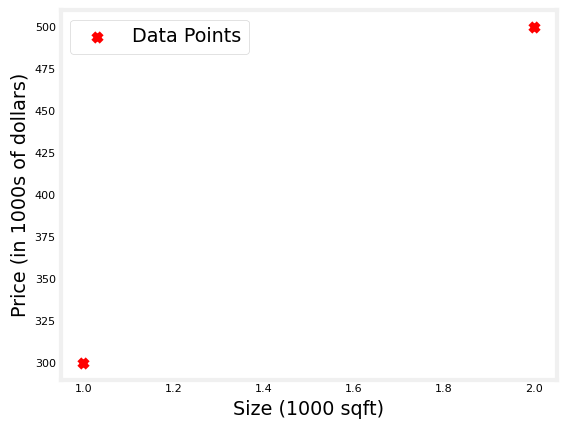

In [ ]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model
The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [ ]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

Let's examine the weights.

In [ ]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [ ]:
X_train[0].reshape(1,1)

array([[1.]], dtype=float32)

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.60545003]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [ ]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.60545003]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [ ]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [ ]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def _to_numpy(x):
    # helper: convert tensors/callables/arrays to 1-D numpy arrays
    if callable(x):
        # we will call it later with X, so return sentinel
        return x
    try:
        # for tf.Tensor or np.array or python list
        a = np.array(x)
    except Exception:
        return x
    # flatten to 1-D when possible
    if a.ndim > 1 and a.shape[1] == 1:
        a = a.reshape(-1)
    return a

def plt_linear(*args, xmin=-6, xmax=6):
    """
    Flexible plotting:
    - Old style: plt_linear(w, b, xmin, xmax)  -> plots y = w*x + b
    - Data style: plt_linear(X, Y, pred1, pred2=None, ...)
        X, Y: 1D arrays (or convertible)
        pred: either a 1D array of predictions (same length as X) OR a callable(model/function)
              that accepts X and returns predicted y (array-like or tf.Tensor)
    Optional keyword args:
        xmin, xmax: used only for old-style linear plot
    """
    if len(args) >= 4 and np.size(args[0]) == 1 and np.size(args[1]) == 1:
        # treat as old signature: (w, b, xmin, xmax) or (w, b, ...)
        w = float(np.ravel(args[0])[0])
        b = float(np.ravel(args[1])[0])
        x = np.linspace(xmin, xmax, 200)
        y = w * x + b
        plt.figure()
        plt.plot(x, y, label=f'linear w={w:.3g}, b={b:.3g}')
        plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True)
        plt.show()
        return

    # Otherwise treat as data + predictions
    if len(args) < 3:
        raise ValueError("Usage: plt_linear(X, Y, pred1, pred2=None, ...).")

    X = np.ravel(np.array(args[0]))
    Y = np.ravel(np.array(args[1]))
    if X.shape[0] != Y.shape[0]:
        raise ValueError("X and Y must have the same length.")

    preds_raw = args[2:]
    preds = []
    labels = []
    for i, p in enumerate(preds_raw, start=1):
        if callable(p):
            # call with X; try passing plain numpy array
            try:
                out = p(X)
            except Exception:
                # try reshaping X to (N,1) in case model expects that
                out = p(X.reshape(-1, 1))
            out = np.array(out)
        else:
            out = np.array(p)

        # flatten if needed
        if out.ndim > 1 and out.shape[1] == 1:
            out = out.reshape(-1)
        out = out.ravel()
        if out.shape[0] != X.shape[0]:
            # if predictions are a single scalar, broadcast; otherwise error
            if out.size == 1:
                out = np.full_like(X, out.item(), dtype=float)
            else:
                raise ValueError(f"Prediction #{i} length {out.shape[0]} != X length {X.shape[0]}")
        preds.append(out)
        # label detection: use model name if possible, else generic
        name = getattr(p, "name", None) or getattr(p, "__name__", None) or f"pred{i}"
        labels.append(str(name))

    # sort by X for neat line plotting
    idx = np.argsort(X)
    Xs = X[idx]
    Ys = Y[idx]

    plt.figure()
    plt.scatter(X, Y, s=40, alpha=0.6, label='data')
    for pred_arr, lbl in zip(preds, labels):
        plt.plot(Xs, pred_arr[idx], linewidth=2, label=f'pred: {lbl}')
    plt.xlabel('X'); plt.ylabel('Y'); plt.legend(); plt.grid(True)
    plt.show()


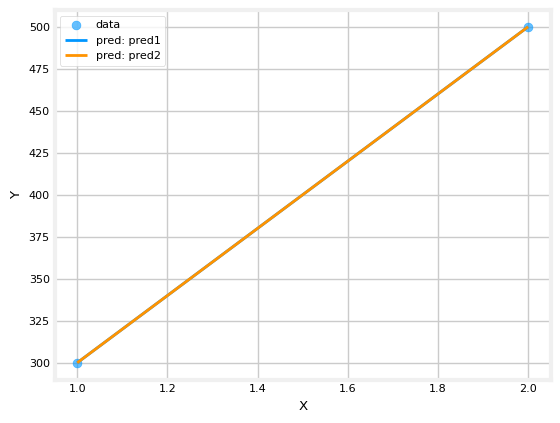

In [ ]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$

Let's set $w$ and $b$ to some known values and check the model.


### DataSet
We'll use an example from Course 1, logistic regression.

In [ ]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [ ]:
pos = Y_train == 1
neg = Y_train == 0
print(pos)
X_train[pos]

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]]


array([3., 4., 5.], dtype=float32)

In [ ]:
# redefine dlc as a simple dict of color names
dlc = {
    "dlblue": "C0",
    "dlorange": "C1",
    "dlgreen": "C2",
    "dlred": "C3",
    "dlpurple": "C4"
}

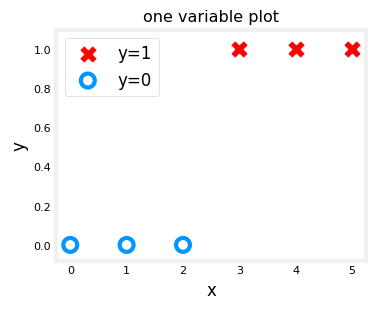

In [ ]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [ ]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.8322252]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values.

In [ ]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [ ]:
X_train[2].reshape(1,1)

array([[2.]], dtype=float32)

Let's compare equation (2) to the layer output.

In [ ]:
a1 = model.predict(X_train[5].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[5].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.99592984]]
[[0.99592986]]


They produce the same values!
Now, we can use our logistic layer and NumPy model to make predictions on our training data.

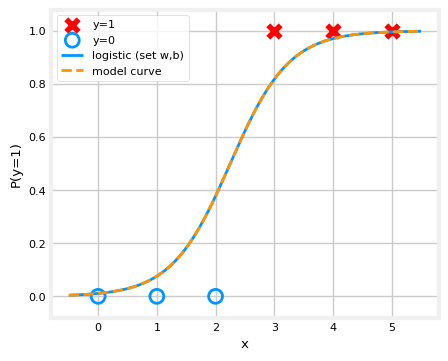

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def _make_mask(m, N, Y=None):
    m_arr = np.asarray(m)
    # boolean mask already
    if m_arr.dtype == bool:
        mask = m_arr.ravel()
        if mask.size != N:
            mask = mask.reshape(-1)[:N]  # try salvage
    # integer indices (or list of indices)
    elif np.issubdtype(m_arr.dtype, np.integer):
        mask = np.zeros(N, dtype=bool)
        mask[np.asarray(m_arr).ravel()] = True
    # maybe column vector like shape (N,1)
    elif m_arr.ndim > 1 and m_arr.size == N:
        mask = m_arr.ravel().astype(bool)
    # fallback: treat as logical comparison against Y if Y provided
    elif Y is not None:
        try:
            mask = (np.ravel(Y) == np.ravel(m_arr).item())
        except Exception:
            mask = (np.ravel(Y) == 1)
    else:
        mask = np.zeros(N, dtype=bool)
    return mask

def plot_logistic_sanitized(X, Y, model=None, set_w=None, set_b=None, pos=None, neg=None):
    # coerce X, Y to 1-D numeric arrays
    X = np.asarray(X).squeeze()
    if X.ndim > 1:
        X = X.reshape(-1)
    Y = np.asarray(Y).squeeze()
    if Y.ndim > 1:
        Y = Y.reshape(-1)

    N = X.shape[0]
    # default pos/neg from labels if not provided
    if pos is None:
        pos = (Y == 1)
    if neg is None:
        neg = (Y == 0)

    pos_mask = _make_mask(pos, N, Y)
    neg_mask = _make_mask(neg, N, Y)

    # try recover colors from dlc (robust)
    try:
        dlblue = dlc["dlblue"]
    except Exception:
        try:
            dlblue = getattr(dlc, "colors", {}).get("dlblue", "C0")
        except Exception:
            dlblue = "C0"

    fig, ax = plt.subplots(1,1,figsize=(5,4))
    ax.scatter(X[pos_mask], Y[pos_mask], marker='x', s=80, c='red', label='y=1')
    ax.scatter(X[neg_mask], Y[neg_mask], marker='o', s=100, facecolors='none',
               edgecolors=dlblue, lw=2, label='y=0')

    # plot logistic curve from set_w/set_b if provided
    if set_w is not None and set_b is not None:
        try:
            w = float(np.ravel(set_w)[0])
            b = float(np.ravel(set_b)[0])
            xx = np.linspace(np.min(X)-0.5, np.max(X)+0.5, 300)
            yy = 1.0 / (1.0 + np.exp(-(w*xx + b)))
            ax.plot(xx, yy, linewidth=2, label='logistic (set w,b)')
        except Exception:
            pass

    # if model (callable) provided, try plotting its predicted curve
    if model is not None:
        try:
            xx = np.linspace(np.min(X)-0.5, np.max(X)+0.5, 300)
            # try calling model directly, then try predict, then try reshape
            try:
                preds = model(xx)
            except Exception:
                try:
                    preds = model.predict(xx)
                except Exception:
                    preds = model(xx.reshape(-1,1))
            preds = np.asarray(preds).ravel()
            preds = np.clip(preds, 0.0, 1.0)
            ax.plot(xx, preds, linestyle='--', linewidth=2, label='model curve')
        except Exception:
            pass

    ax.set_ylim(-0.08, 1.08)
    ax.set_xlabel('x'); ax.set_ylabel('P(y=1)'); ax.legend(); ax.grid(True)
    plt.show()

# call it with your variables
plot_logistic_sanitized(X_train, Y_train, model=model, set_w=set_w, set_b=set_b, pos=pos, neg=neg)


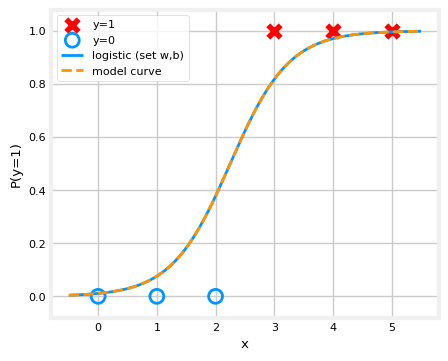

In [ ]:
plot_logistic_sanitized(X_train, Y_train, model, set_w, set_b, pos, neg)

The shading above reflects the output of the sigmoid which varies from 0 to 1.

# Congratulations!
You built a very simple neural network and have explored the similarities of a neuron to the linear and logistic regression from Course 1.